In [42]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [43]:
# Set the path to the file you'd like to load
file_path = "household_energy_consumption.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "samxsam/household-energy-consumption",
  file_path,
)

#print("First 5 records:", df.head())

/tmp/ipython-input-2572406500.py:5: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


In [44]:
# Assuming the Date column is in the format 'yyyy-dd-mm', let's convert it to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%d-%m')

# Function to assign a season based on the month
def get_season(month):
    if month in [9, 10, 11, 12, 1, 2]:
        return 0
    elif month in [3, 4, 5, 6, 7, 8]:
        return 1

# Create a new column 'Season' based on the month of the Date column
df['Season'] = df['Date'].dt.month.apply(get_season)

# Now extract the features
x1_season = df["Season"].tolist()
x2_Household_size = df["Household_Size"].tolist()
x3_Avg_tempc = df["Avg_Temperature_C"].tolist()
x4_has_ac = df["Has_AC"].tolist()
y_power_consumed = df["Energy_Consumption_kWh"].tolist()

#Updating values of has AC to binary
for i in range(len(x4_has_ac)):
  if(x4_has_ac[i]=="Yes"):
    x4_has_ac[i]=1
  else:
    x4_has_ac[i]=0

#Converting to numpy arrays for dot multiplication
x1_season = np.array(x1_season)
x2_Household_size = np.array(x2_Household_size)
x3_Avg_tempc = np.array(x3_Avg_tempc)
x4_has_ac_array = np.array(x4_has_ac)
y_power_consumed = np.array(y_power_consumed)

# Output for checking
#print(df[['Date', 'Season']].head())  # Just to check if the season is being assigned correctly


In [45]:
#Feature engineering
x5 = np.array([x4_has_ac_array[i] * x1_season[i] for i in range(len(x4_has_ac_array))])

In [46]:
# @title SCIKIT LEARN CODE:
#Training data set
X = np.array([x1_season,x2_Household_size,x3_Avg_tempc,x4_has_ac_array,x5]).T
model = LinearRegression()
model.fit(X, y_power_consumed)
w = np.array(model.coef_)
b = model.intercept_

In [47]:
'''
#Gradient descent
m = y_power_consumed.size
def cost():
  J = 0
  for i in range(m):
    f = np.dot(w,X[i])+b
    J+=(f-y_power_consumed[i])**2
  f/=(2*m)
  return J
def Grad_Desc(J,w,b):
  A = 0.7
  dJ_dW = 0
  dJ_dB = 0
  for i in range(m):
    f = np.dot(w,X[i])+b
    dJ_dW = (f-y_power_consumed[i])*X[i]
    dJ_dB = (f-y_power_consumed[i])
  dJ_dW/=m
  dJ_dB/=m
  w = w-(A*dJ_dW)
  b = b-(A*dJ_dB)'''

'\n#Gradient descent\nm = y_power_consumed.size\ndef cost():\n  J = 0\n  for i in range(m):\n    f = np.dot(w,X[i])+b\n    J+=(f-y_power_consumed[i])**2\n  f/=(2*m)\n  return J\ndef Grad_Desc(J,w,b):\n  A = 0.7\n  dJ_dW = 0\n  dJ_dB = 0\n  for i in range(m):\n    f = np.dot(w,X[i])+b\n    dJ_dW = (f-y_power_consumed[i])*X[i]\n    dJ_dB = (f-y_power_consumed[i])\n  dJ_dW/=m\n  dJ_dB/=m\n  w = w-(A*dJ_dW)\n  b = b-(A*dJ_dB)'

In [48]:
'''
#Using grad desc
J = cost()
c_x = J
while(J<=c_x):
  print("Hi\n")
  c_x = 0
  Grad_Desc(J,w,b)
  for i in range(m):
    f = np.dot(w,X[i])+b
    c_x+=(f-y_power_consumed[i])**2
  c_x/=(2*m)
  if(c_x<J):
    J = c_x
  else:
    break'''

'\n#Using grad desc\nJ = cost()\nc_x = J\nwhile(J<=c_x):\n  print("Hi\n")\n  c_x = 0\n  Grad_Desc(J,w,b)\n  for i in range(m):\n    f = np.dot(w,X[i])+b\n    c_x+=(f-y_power_consumed[i])**2\n  c_x/=(2*m)\n  if(c_x<J):\n    J = c_x\n  else:\n    break'

In [49]:
#NORMALISATION CODE
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [50]:
# Step 1: Transform your features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)  # This adds the polynomial features to ensure the model is not underfitting for my project

# Step 2: Update the shape variables
m = len(y_power_consumed)      # still same
w = np.zeros(X_poly.shape[1])  # weights must match new feature count

In [51]:
#CG Grad desc
alpha = 0.0001   # Learning rate
iterations = 5000  # Number of iterations
m = len(y_power_consumed)  # Number of training examples
losses = []
# Initialize weights and bias

#w = np.zeros(X.shape[1])  # Weight vector for all features
w = np.random.randn(X_poly.shape[1]) * 0.01
b = 0  # Bias term

# Gradient Descent Loop
for i in range(iterations):
    # Make predictions
    predictions = X_poly.dot(w) + b
    loss = np.mean((predictions - y_power_consumed)**2)
    losses.append(loss)
    # Calculate error
    error = (predictions - y_power_consumed)

    # Compute gradients
    dw = (2/m) * X_poly.T.dot(error)  # Gradient with respect to w
    db = (2/m) * np.sum(error)   # Gradient with respect to b

    # Update parameters
    w -= alpha * dw
    b -= alpha * db

    # Optionally, print the loss every 100 iterations
    if i % 100 == 0:
        loss = np.mean(error**2)  # Mean Squared Error (MSE)
        print(f"Iteration {i}, Loss: {loss}")

# Output optimized parameters
print("Optimized weights:", w)
print("Optimized bias:", b)

Iteration 0, Loss: 141.49234405948374
Iteration 100, Loss: 109.92954737536157
Iteration 200, Loss: 87.04316891444526
Iteration 300, Loss: 70.37162475495325
Iteration 400, Loss: 58.15507662132713
Iteration 500, Loss: 49.1352221548906
Iteration 600, Loss: 42.41221371657674
Iteration 700, Loss: 37.34240396424125
Iteration 800, Loss: 33.46526822820349
Iteration 900, Loss: 30.45117807953144
Iteration 1000, Loss: 28.064076230027506
Iteration 1100, Loss: 26.134800716618532
Iteration 1200, Loss: 24.542019657105833
Iteration 1300, Loss: 23.198604967818927
Iteration 1400, Loss: 22.04189310539478
Iteration 1500, Loss: 21.026723740663453
Iteration 1600, Loss: 20.12046375064218
Iteration 1700, Loss: 19.299450084588788
Iteration 1800, Loss: 18.546446691786457
Iteration 1900, Loss: 17.848826208508733
Iteration 2000, Loss: 17.197269650543895
Iteration 2100, Loss: 16.58483635125425
Iteration 2200, Loss: 16.006298545008384
Iteration 2300, Loss: 15.457665125513739
Iteration 2400, Loss: 14.935840640931834

In [52]:
'''#User inputs

x_1 = int(input("Enter season\n1 for Summer and 0 for Winter:"))
x_2 = int(input("Enter number of residents: "))
x_3 = int(input("Enter average temperature (In Celsius): "))
x_4 = int(input("Does household have AC?\n1 for yes and 0 for no: "))

X = np.array([x_1,x_2,x_3,x_4]).T'''

'#User inputs\n\nx_1 = int(input("Enter season\n1 for Summer and 0 for Winter:"))\nx_2 = int(input("Enter number of residents: "))\nx_3 = int(input("Enter average temperature (In Celsius): "))\nx_4 = int(input("Does household have AC?\n1 for yes and 0 for no: "))\n\nX = np.array([x_1,x_2,x_3,x_4]).T'

In [53]:
'''#Calculations
y = np.dot(X,w)+b
print(y)'''

'#Calculations\ny = np.dot(X,w)+b\nprint(y)'

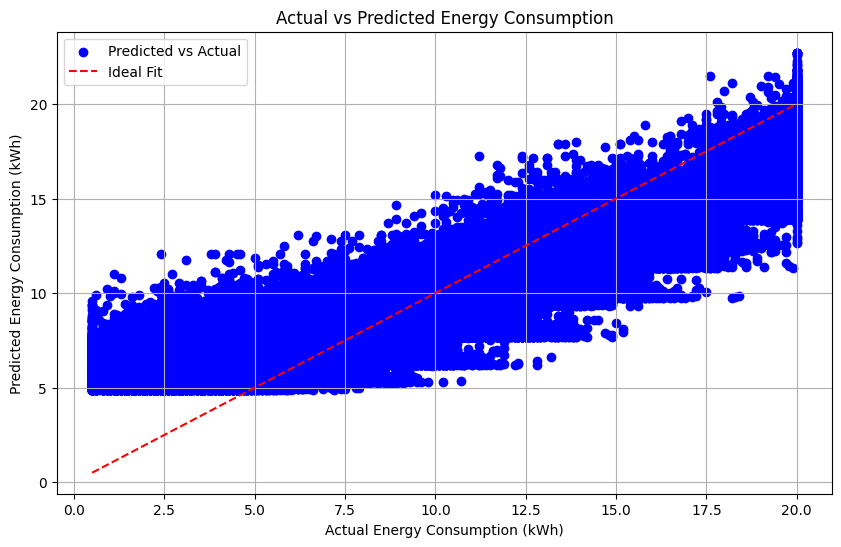

In [54]:
X = np.column_stack((x1_season,x2_Household_size, x3_Avg_tempc, x4_has_ac_array, x5))
y_pred = model.predict(X)
# Predicting the energy consumption using the model
for i in range(m):
  y_pred[i] = np.dot(w,X_poly[i])+b

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_power_consumed, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_power_consumed), max(y_power_consumed)], [min(y_power_consumed), max(y_power_consumed)], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Energy Consumption (kWh)')
plt.ylabel('Predicted Energy Consumption (kWh)')
plt.title('Actual vs Predicted Energy Consumption')
plt.legend()
plt.grid(True)
plt.show()

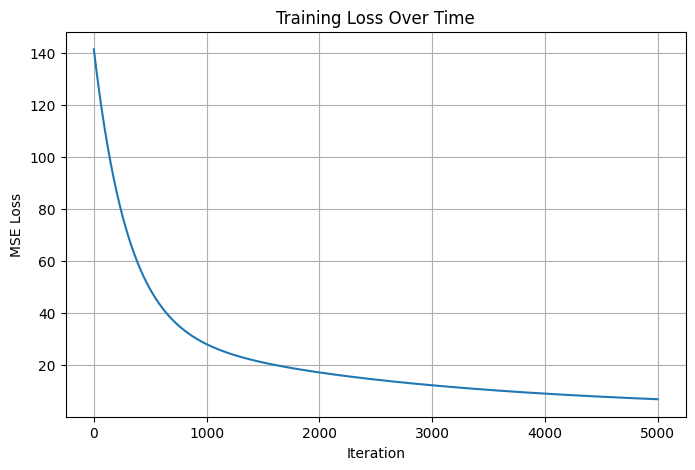

In [55]:
plt.figure(figsize=(8, 5))
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.title("Training Loss Over Time")
plt.grid(True)
plt.show()

In [56]:
def val_predictor(x1_val,x2_val,x3_val,x4_val):
  x5_val = x4_val*x1_val
  input_data = [x1_val,x2_val,x3_val,x4_val,x5_val]
  input_array = (np.array(input_data))

  poly_feature = PolynomialFeatures(degree=2, include_bias=False)
  input_data_poly = poly_feature.fit_transform(input_array.reshape(1, -1))

  w = [ 1.63782562, 0.2955455, 3.10494748, 0.11617463, 0.47802296, 0.15499829,
  1.336367, -0.06171957, -0.02883123, -0.71289409, 0.64343077, 0.82411591,
 -0.03998032, 0.36126391, 0.21912596, 0.41516592, 0.08919398, 0.05428366,
  1.6468023, 1.03862785]

  b = 1.6311712895051114

  y_predicted = np.dot(input_data_poly, w) + b
  return y_predicted

In [61]:
x1 = int(input("Enter the season (0-winter/1-summer): "))
x2 = int(input("Enter number of residents: "))
x3 = int(input("Enter average temperature (In Celsius): "))
x4 = int(input("Does household have AC?\n1 for yes and 0 for no: "))

y_power_consp = val_predictor(x1,x2,x3,x4)

rate = y_power_consp[0] * 6.47

print("Rs.",rate, "is the elec bill amount for this month")


Enter the season (0-winter/1-summer): 0
Enter number of residents: 3
Enter average temperature (In Celsius): 33
Does household have AC?
1 for yes and 0 for no: 1
Rs. 2877.458675873398 is the elec bill amount for this month
